In [48]:
# 데이터 출처: https://archive.ics.uci.edu/dataset/222/bank+marketing
# Github 출처: https://github.com/uci-ml-repo/ucimlrepo

#기본 모듈 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# warning을 모두 무시하는 것은 좋지 않으나 과제 수행을 쉽게할 수 있도록 무시설정
import warnings
warnings.filterwarnings(action='ignore')

## 문제1: 라이브러리를 통해 데이터 불러오기
- 다음코드는 데이터를 불러오고 df 변수명에 저장하는 코드입니다.
- github 문서를 읽고 데이터를 요청하여 로컬환경에 저장해보세요

In [49]:
'''문제 시작'''

!pip install -U ucimlrepo
from ucimlrepo import list_available_datasets, fetch_ucirepo

# list_available_datasets()을 통해 필요한 데이터셋의 id 확인

bank_marketing = fetch_ucirepo(id=222)
df = bank_marketing['data']['original']
df.to_csv('bank_marketing.csv')

'''문제 끝'''
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


## 데이터 전처리 & EDA 간단히

In [50]:
#데이터 불러오기 
df = pd.read_csv('./bank_marketing.csv')

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33908, 17) (11303, 17) (33908, 1) (11303, 1)


In [51]:
X_train.describe(include = 'all')

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,33908.000000,33908.000000,33688,33908,32522,33908,33908.000000,33908,33908,24180,33908.000000,33908,33908.000000,33908.000000,33908.000000,33908.000000,6153
unique,NaN,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,10310,NaN,NaN,NaN,NaN,3645
mean,22623.359030,40.907957,NaN,NaN,NaN,NaN,1362.457709,NaN,NaN,NaN,15.825233,NaN,258.473015,2.759555,40.024979,0.582635,NaN
std,13037.536328,10.620338,NaN,NaN,NaN,NaN,3052.176471,NaN,NaN,NaN,8.339007,NaN,258.936344,3.094060,100.018015,2.445884,NaN
min,0.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,11331.750000,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,22638.500000,39.000000,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,33910.250000,48.000000,NaN,NaN,NaN,NaN,1432.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


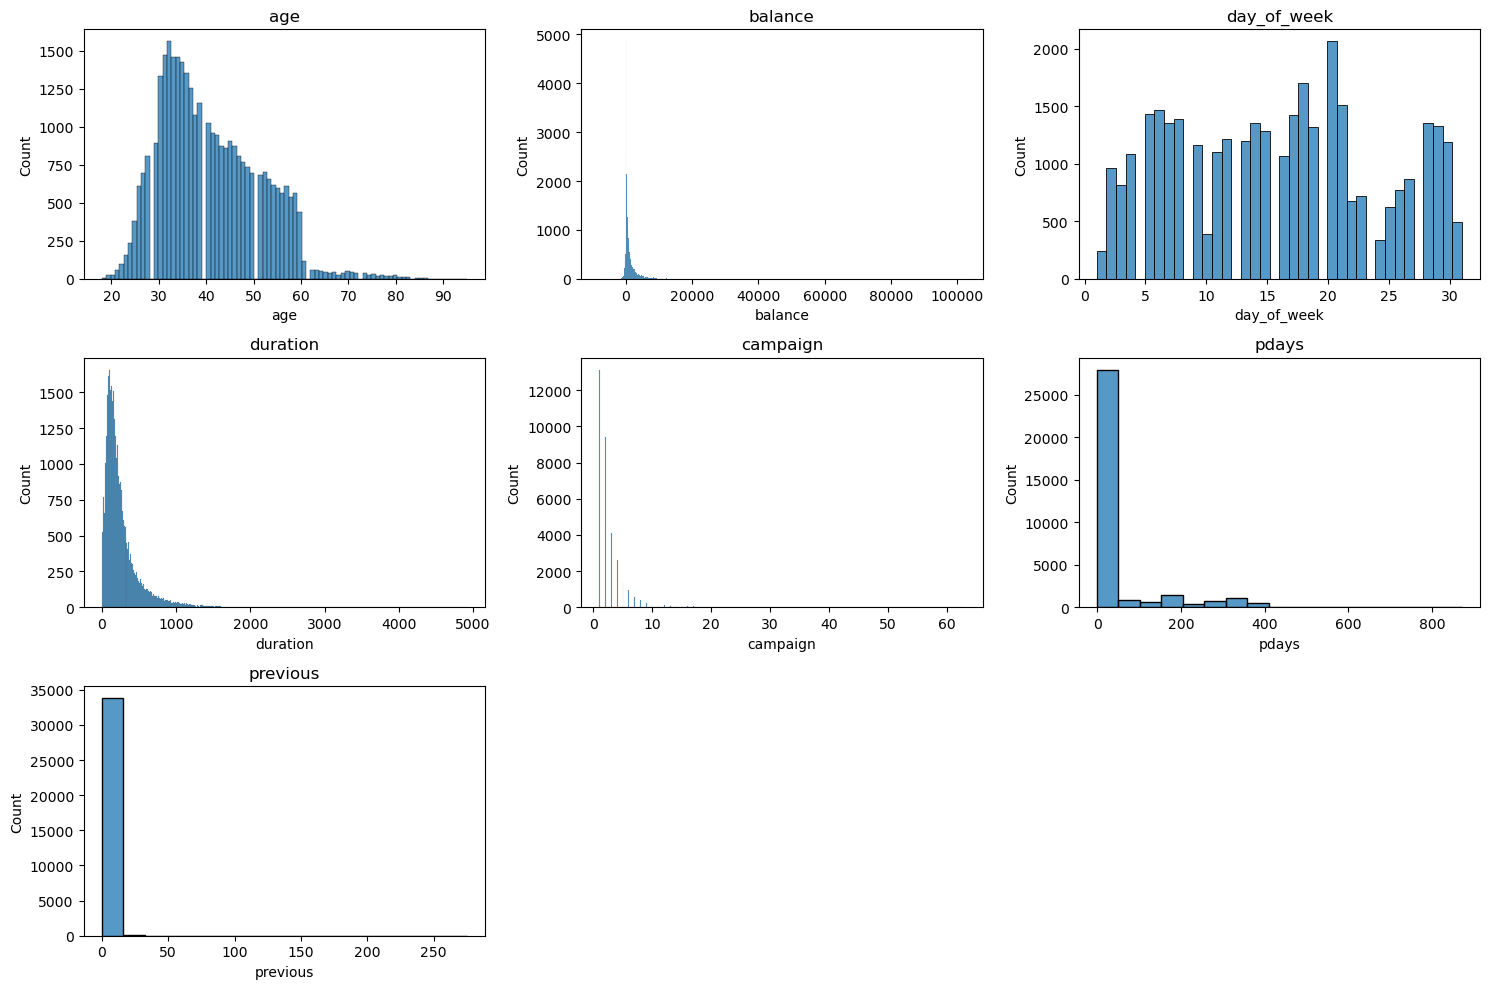

In [52]:
#수치형 변수 시각화
def get_3_hist(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_hist(X_train, numeric_col)

In [53]:
# 이상치가 많은 컬럼에 대해서 로그스케일 적용

#balance 값 보정
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min


# 로그스케일 적용
for col in ['duration','balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [54]:
X_train.describe()

,Unnamed: 0,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,22623.359030,40.907957,9.118624,15.825233,5.172125,2.759555,40.024979,0.225184
std,13037.536328,10.620338,0.214213,8.339007,0.922256,3.094060,100.018015,0.533092
min,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11331.750000,33.000000,8.998878,8.000000,4.644391,1.000000,-1.000000,0.000000
50%,22638.500000,39.000000,9.044404,16.000000,5.198497,2.000000,-1.000000,0.000000
75%,33910.250000,48.000000,9.153982,21.000000,5.765191,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,11.609571,31.000000,8.500861,63.000000,871.000000,5.620401


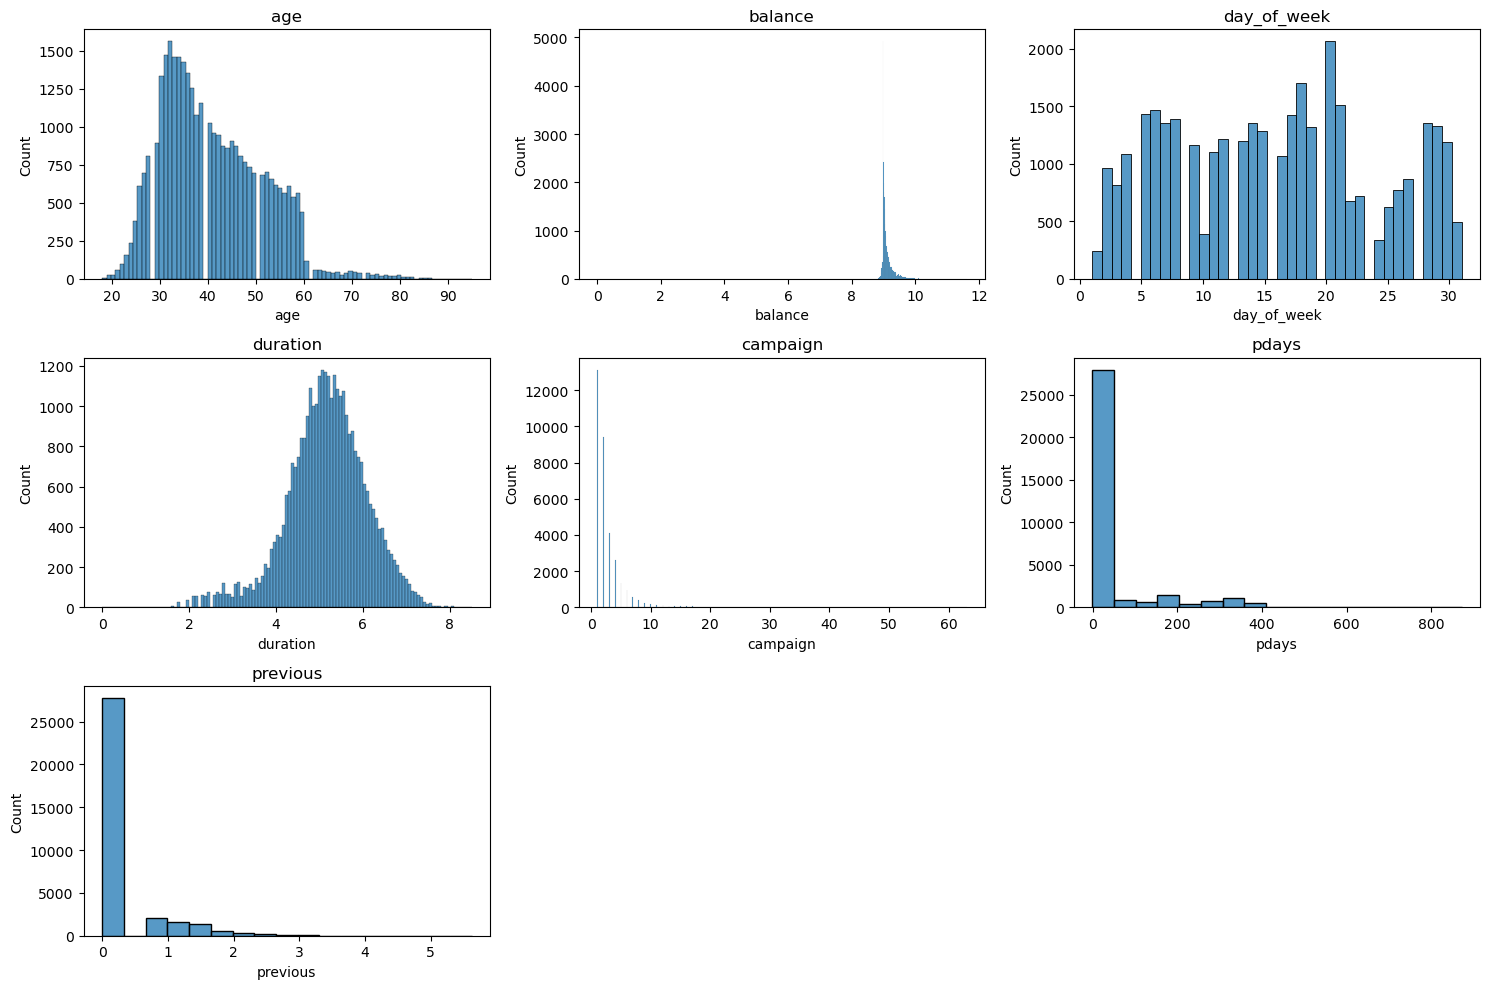

In [55]:
#로그스케일 변환 후 시각화
get_3_hist(X_train, numeric_col)

## 문제 2: Y 변수 인코딩 적용하기 
- Y 라벨을 no,yes를 사용자 정의함수와 apply를 이용하여 0,1로 인코딩 하세요
- 함수명은 get_binary로 설정하세요.
- Pandas docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [56]:
'''문제 시작'''

def get_binary(x):
    """
    주어진 문자열 x가 'no'일 경우 0을 반환하고, 그렇지 않을 경우 1을 반환합니다.
    이 함수는 일반적으로 두 가지 범주(예: 'yes'와 'no')를 가진 데이터를 이진 형식(0과 1)으로 변환하는 데 사용됩니다.
    
    Args:
        x (str): 변환할 문자열. 'no' 또는 그 외의 값을 가질 수 있습니다.
    Returns:
        int: 문자열 x가 'no'일 경우 0, 그렇지 않을 경우 1을 반환합니다.
    """
    # 이부분을 작성해주세요
    if x == 'no':
        return 0
    else:
        return 1

    # y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)

    # y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)


'''문제 끝'''
#잘 적용되었는지 확인
display(y_train[:10])

,y
24915,0
11794,0
1279,0
913,0
5554,0
24126,1
38658,0
5469,0
14012,0
15788,0


## 문제3: 간단한 모델링 & 평가함수 생성하기
- 평가하기 위한 다음 함수를 완성하세요
- 필요한 모듈율 불러오고, 학습시키고, 결과를 저장하세요
    - y_pred_train : 훈련데이터 예측결과 변수
    - y_pred_test: 테스트데이터 예측결과 변수

In [57]:
def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    """ train과 test 데이터와 X변수 컬럼을 받아 평가지표를 내는 함수입니다.

    Args:
        train (pd.DataFrame): train 데이터프레임
        test (pd.DataFrame): test 데이터프레임
        x_var_list (list): 모델링에 사용할 변수 리스트
    """
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    '''문제 시작'''
    #모듈불러오기
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import f1_score, accuracy_score
    
    #모델가져오기 & 학습하기
    logit = LogisticRegression()
    logit.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    y_pred_train = logit.predict(X_train)
    y_pred_test = logit.predict(X_test)
    
    
    '''문제 끝'''
    
    #평가표 생성
    result = pd.DataFrame({'acc' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
                            'f1_score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)]},
                            index = ['train','test'])
    
    display(result.round(2))

# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

,acc,f1_score
train,0.89,0.23
test,0.89,0.20


## 문제4: 모델링 수행하기
- 전체 변수를 가공하여 예측모델링을 수행하는 함수 get_numeric_sc를 완성해보세요

In [58]:
def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """데이터를 전달받아 수치형 변수 스케일링하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrame: train, test 데이터프레임
    """
    # 수치형변수
    # age, balance, day_of_week, duration, campaign, pdays,previous
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['pdays','previous']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','duration','day_of_week','balance','campaign']
    
    '''문제 시작'''
    #모듈 불러오기
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    #모델 가져오기
    stsc = StandardScaler()
    mmsc = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    X_train[sc_col] = stsc.fit_transform(X_train[sc_col])
    X_test[sc_col] = stsc.fit_transform(X_test[sc_col])
    
    #train, test 데이터변환(MinMax Scaler이용)
    X_train[mm_col] = mmsc.fit_transform(X_train[mm_col])
    X_test[mm_col] = mmsc.fit_transform(X_test[mm_col])
    
    '''문제 끝'''
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [59]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

,acc,f1_score
train,0.89,0.25
test,0.88,0.01


In [60]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """ 데이터를 전달받아 범주형 변수 더미화하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrmae, list: train, test 데이터프레임, 더미화된 컬럼
    """
    
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #범주형 컬럼 더미화 하기
    X_train_dummies = pd.get_dummies(X_train[category_col])
    X_test_dummies = pd.get_dummies(X_test[category_col])
    
    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
    return X_train, X_test, X_train_dummies.columns.to_list()
    

X_train, X_test, col_dummies = get_category(X_train,X_test)

In [61]:
# 범주형 변수를 이용한 학습&평가
get_score(X_train,X_test, col_dummies)

,acc,f1_score
train,0.89,0.27
test,0.89,0.29


In [62]:
# 수치형 + 범주형 변수 모두 사용하여 평가
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.90,0.45
test,0.89,0.23


## 심화 (강의엔 없는내용)
- accuracy score는 높은 반면 f1-score는 낮습니다. 이걸로 볼때 y값이 편향되어있음을 알 수 있습니다.
    - 또한, f1-score는 train에는 100% 확률로 예측한 반면, test는 50% 정도로 터무니 없이 낮습니다. train 데이터에 과적합이 의심됩니다. 

- 이진분류(0,1) 문제는 기본적으로 한쪽으로 찍으면 50%의 확률이 나오기 때문에 50%의 결과는 기본만 못합니다.(비용, 시간 투입고려)
    - 게다가 파이차트로 확인해보니(하단) 대출거절이 기본적인 고객의 패턴입니다.(약 88%)
- 이를 극복하기 위해 y값이 편향되어 있는 문제 해결을 위해 y=1 인 데이터값을 증강하는  oversampling 방법을 수행해보겠습니다

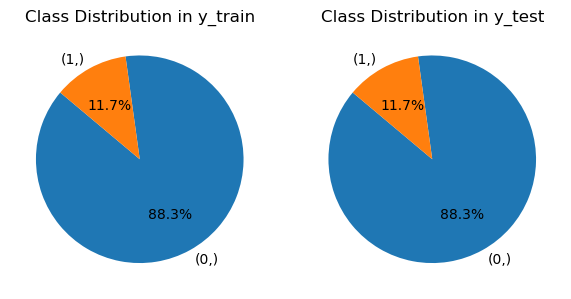

In [63]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [64]:
#데이터다시 불러오기
df = pd.read_csv('./bank_marketing.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

- SMOTE 알고리즘을 통한 oversampling 적용

In [65]:
#최초 1회 실행 후 주석처리
#pip install imbalanced-learn

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

- 하기 내용은 이전과 같음

In [67]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환
X_train, X_test = get_numeric_sc(X_train, X_test)

In [68]:
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.93,0.93
test,0.92,0.92


# (선택, 서술형)

- 위 모델링은 데이터 전처리 등 개선할 점이 있습니다. 어떤 부분을 개선하면 좋을까요? 

- 여기 불릿포인트에 작성해보세요 

1) balance 음수값 보정
   : 로그 스캐일을 하기 위해 음수값을 없앴다. 로그에서 진수의 조건이 0보다 커야하기 때문

2) np.log()가 아닌 np.log1p()를 사용하는 이유
   : 위에서의 보정에 의해 정의역은 적어도 0보다 크거나 같아졌다
     x = 0 인 경우 np.log(x) 값은 무한대로 발산하기 때문에
     x + 1을 해주는 np.log1p()를 사용해야
     x = 0인 경우에도 최솟값이 0이 된다

3) 더 나은 인코딩 - 차원축소
   : get_dummies()로 나온 변수별 컬럼 중 마지막 1개 컬럼은 삭제할 수 있을 거 같다
     가령 df['education'].unique()는 ['tertiary', 'secondary', 'primary'].
     get_dummies() 시 3개의 컬럼이 나온다

     이중 1개의 컬럼은 없어도 나머지 2개의 컬럼값이 0이라면
     무조건 남은 1개의 카테고리에 속하기 때문에 판별 가능하므로
     변수별로 하나의 컬럼은 삭제 가능할 것으로 보인다

4) 결측치 처리
   : 결측치 처리가 없다

5) 하이퍼 파라미터 조정
   : 그리드서치를 통해 하이퍼파라미터를 최적화한다

In [91]:
# 결측치 처리

## 결측치 확인
df2 = pd.read_csv('./bank_marketing.csv')

df2.isnull().sum()

## job, eduaction, contact 까지는 대치할만한데
## poutcome은 버리는 게 좋을 거 같다


Unnamed: 0         0
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [90]:
df2['poutcome'].value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

In [75]:
raw = fetch_ucirepo(id=222)

In [84]:
raw['variables']['description'][1]

"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"